# Install Packages and azure connection

In [ ]:
!pip install --quiet langchain langchain_community langchain-openai langchain-experimental neo4j py2neo openai tiktoken

In [ ]:
from langchain_openai import AzureChatOpenAI

In [ ]:
pip install -U :class:`~langchain-openai

/bin/bash: -c: line 1: unexpected EOF while looking for matching ``'
/bin/bash: -c: line 2: syntax error: unexpected end of file


In [ ]:
pip install json-repair

In [ ]:
pip install -U langchain langchain-openai

In [ ]:
LANGSMITH_TRACING= True
LANGSMITH_ENDPOINT="https://api.smith.langchain.com"
LANGSMITH_API_KEY="ADD_API_KEY"
LANGSMITH_PROJECT="pr-earnest-inspection-19"

**Adding credentials to connect with AZURE OPENAI API**

In [ ]:
import os
from langchain_openai import AzureChatOpenAI
from langchain_experimental.graph_transformers import LLMGraphTransformer

# LangChain / Graph
from langchain_community.graphs import Neo4jGraph
from langchain_experimental.graph_transformers import LLMGraphTransformer
from langchain_core.documents import Document
from openai import OpenAI
import os
from langchain_openai import AzureChatOpenAI
from langchain_experimental.graph_transformers import LLMGraphTransformer
# Set Azure OpenAI API Details
os.environ["AZURE_OPENAI_API_KEY"] = "2K3CrJS4ZTUJoCKigUhqZyAGJVMbpGb3vIKaZasEZ4dJUOmvuCG9JQQJ99BDACfhMk5XJ3w3AAAAACOGR6pu"
os.environ["AZURE_OPENAI_ENDPOINT"] = "https://srija-m9t1nojf-swedencentral.cognitiveservices.azure.com/"
os.environ["AZURE_OPENAI_DEPLOYMENT"] = "gpt-4o"  # Must match Azure
os.environ["AZURE_OPENAI_API_VERSION"] = "2024-08-01-preview"  # Recommended version

# Initialize AzureChatOpenAI (Fixed format)
llm = AzureChatOpenAI(
    azure_endpoint=os.environ["AZURE_OPENAI_ENDPOINT"],
    azure_deployment=os.environ["AZURE_OPENAI_DEPLOYMENT"],
    api_key=os.environ["AZURE_OPENAI_API_KEY"],
    api_version=os.environ["AZURE_OPENAI_API_VERSION"],
    temperature=0.0
)

# Test the connection with .invoke()
try:
    response = llm.invoke(
        [{"role": "system", "content": "Hello, can you confirm this works?"}]
    )
    print("✅ Azure OpenAI is working!")
    print(response)
except Exception as e:
    print("❌ Azure OpenAI is NOT working:", e)

# Create LLM->Graph transformer
llm_transformer = LLMGraphTransformer(llm=llm)


✅ Azure OpenAI is working!
content='Yes, I can confirm that this works! How can I assist you today? 😊' additional_kwargs={'refusal': None} response_metadata={'token_usage': {'completion_tokens': 18, 'prompt_tokens': 15, 'total_tokens': 33, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-11-20', 'system_fingerprint': 'fp_ee1d74bde0', 'id': 'chatcmpl-BRNkdCpBekTFnuhg6izOQfXDQTBIS', 'prompt_filter_results': [{'prompt_index': 0, 'content_filter_results': {}}], 'finish_reason': 'stop', 'logprobs': None, 'content_filter_results': {'hate': {'filtered': False, 'severity': 'safe'}, 'self_harm': {'filtered': False, 'severity': 'safe'}, 'sexual': {'filtered': False, 'severity': 'safe'}, 'violence': {'filtered': False, 'severity': 'safe'}}} id='run-ac9d48c8-85fc-47cf-a3d6-296584681844-0' usage_metadata={'input_token

In [ ]:
!neo4j start

/bin/bash: line 1: neo4j: command not found


In [ ]:
from neo4j import GraphDatabase

# URI examples: "neo4j://localhost", "neo4j+s://xxx.databases.neo4j.io"
URI = "neo4j+s://ba79352e.databases.neo4j.io"
AUTH = ("neo4j", "TBxAWu1Q4M8Ee3WkJXHKH7p8azzTZUItL6d5qXvpFJY")

with GraphDatabase.driver(URI, auth=AUTH) as driver:
    driver.verify_connectivity()

In [ ]:
!pip install pymupdf

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.0/20.0 MB 40.2 MB/s eta 0:00:00


# Neo4j connection test

In [ ]:
from neo4j import GraphDatabase

URI = "neo4j+s://ba79352e.databases.neo4j.io"
AUTH = ("neo4j", "TBxAWu1Q4M8Ee3WkJXHKH7p8azzTZUItL6d5qXvpFJY")

driver = GraphDatabase.driver(URI, auth=AUTH)

def create_constraints():
    constraints = [
        "CREATE CONSTRAINT IF NOT EXISTS FOR (t:Tool)       REQUIRE t.name IS UNIQUE",
        "CREATE CONSTRAINT IF NOT EXISTS FOR (s:Scenario)   REQUIRE s.scenarioID IS UNIQUE",
        "CREATE CONSTRAINT IF NOT EXISTS FOR (c:Constraint) REQUIRE c.id IS UNIQUE",
    ]
    with driver.session() as session:
        for cql in constraints:
            session.run(cql)
        print("✅ Created/ensured constraints for Tools, Scenarios, Constraints")

create_constraints()


✅ Created/ensured constraints for Tools, Scenarios, Constraints


In [ ]:
!pip uninstall fitz -y #remove the incorrect install
!pip install pymupdf # install the correct package

import pymupdf as fitz

In [ ]:
!pip -q install neo4j

In [ ]:
import os
from getpass import getpass

# ① Supply the URI & user directly (they’re not secrets)
os.environ["NEO4J_URI"]      = "neo4j+s://ba79352e.databases.neo4j.io"
os.environ["NEO4J_USERNAME"] = "neo4j"

# ② Type the password interactively so it never appears in the notebook
os.environ["NEO4J_PASSWORD"] = getpass("Enter your Neo4j Aura password: ")

Enter your Neo4j Aura password: ··········


# Using regex to take out important text from document to graph

In [ ]:
def extract_text_from_pdf(pdf_path):
    text = ""
    doc = fitz.open(pdf_path)
    for page in doc:
        text += page.get_text() + "\n"
    return text

pdf_path = "/content/Specification Sheet 1.pdf"
raw_pdf_text = extract_text_from_pdf(pdf_path)

In [ ]:
import re
from typing import List, Dict, Any
from neo4j import GraphDatabase, basic_auth


class BoschToolProcessor:
    """Process Bosch tool specifications and build a Neo4j knowledge graph."""

    def __init__(self, uri: str, user: str, pwd: str):
        self.driver = GraphDatabase.driver(uri, auth=basic_auth(user, pwd))
        self.verify_connection()

        # Standardize spec name variations to reduce redundancy
        self.standard_spec_map = {
            'height': 'height',
            'height_in': 'height',
            'length': 'length',
            'length_in': 'length',
            'width': 'width',
            'width_in': 'width',
            'weight': 'weight',
            'weight_lbs': 'weight',
            'voltage': 'voltage',
            'voltage_rating': 'voltage',
            'battery': 'voltage',      # e.g., "Battery: 18 V" -> treat as voltage spec
            'rating': 'voltage',
            'planing_width': 'planing_width',
            'planing_depth': 'planing_depth'
        }
        # Standardize unit symbols
        self.unit_symbol_map = {
            'in': 'in', 'inch': 'in', 'inches': 'in',
            'lb': 'lb', 'lbs': 'lb', 'pounds': 'lb',
            'kg': 'kg',
            'v': 'V', 'volt': 'V', 'volts': 'V',
            'rpm': 'RPM', 'bpm': 'BPM',
            'min': 'min', 'minute': 'min', 'minutes': 'min',
            'mm': 'mm', 'cm': 'cm',
            '°f': '°F', '°c': '°C'
        }

    def verify_connection(self):
        try:
            self.driver.verify_connectivity()
            print("✅  Connected to Neo4j Aura")
        except Exception as exc:
            raise RuntimeError(f"Neo4j connection failed: {exc}") from exc



    def create_constraints(self):
        """Create Neo4j constraints for uniqueness on key fields."""
        if not self.driver:
            return
        constraints = [
            "CREATE CONSTRAINT IF NOT EXISTS FOR (t:Tool) REQUIRE t.model_number IS UNIQUE",
            "CREATE CONSTRAINT IF NOT EXISTS FOR (c:Category) REQUIRE c.name IS UNIQUE",
            "CREATE CONSTRAINT IF NOT EXISTS FOR (u:Unit) REQUIRE u.symbol IS UNIQUE",
            "CREATE CONSTRAINT IF NOT EXISTS FOR (s:Scenario) REQUIRE s.scenarioID IS UNIQUE",
            "CREATE CONSTRAINT IF NOT EXISTS FOR (cn:Constraint) REQUIRE cn.id IS UNIQUE",
            "CREATE CONSTRAINT IF NOT EXISTS FOR (l:Limitation) REQUIRE l.id IS UNIQUE",
            "CREATE CONSTRAINT IF NOT EXISTS FOR (s:Specification) REQUIRE s.name IS UNIQUE"
        ]
        with self.driver.session() as session:
            for c in constraints:
                session.run(c)

    def extract_tool_data(self, text: str) -> List[Dict[str, Any]]:
        """
        Extract tool data from the given text of a Bosch specification sheet.
        Returns a list of dictionaries, each representing one tool with its attributes.
        """
        tools = []
        # Regex pattern to identify each tool section in the text.
        # It matches a model number followed by "PROFESSIONAL (Category)".
        model_pattern = re.compile(r'([A-Z0-9\-]+V?-[A-Z0-9]+[A-Z0-9N]*)\s+PROFESSIONAL\s+\(([^)]+)\)')
        # Split text by the model header pattern, keeping the delimiters (model and category) as separate list items.
        sections = model_pattern.split(text)
        if sections and not sections[0].strip():
            sections = sections[1:]  # remove empty prelude if the text starts with a match
        # The resulting list format: [ <intro_text?>, model1, category1, content1, model2, category2, content2, ... ]
        for i in range(0, len(sections), 3):
            if i + 2 >= len(sections):
                break  # not enough parts for a full section
            model_number = sections[i].strip()
            category = sections[i+1].strip()
            content = sections[i+2]  # the block of text for this tool
            tool = {
                "model_number": model_number,
                "name": f"Bosch {model_number} Professional",
                "category": category,
                "specifications": {},
                "accessories": [],
                "includes": [],
                "limitations": [],
                "operational_ranges": []
            }
            # Process each line in the tool's content block
            lines = [ln.strip() for ln in content.splitlines()]
            for line in lines:
                if not line:
                    continue  # skip blank lines
                # Skip section headers or irrelevant lines that are not key: value pairs
                header_keywords = ["includes", "works with", "technical data", "model", "features"]
                if any(line.lower().startswith(word) for word in header_keywords):
                    continue
                if ':' not in line:
                    continue  # not a key-value line
                key, value = line.split(':', 1)
                key = key.strip()
                value = value.strip()
                if not key or not value:
                    continue
                # Normalize the spec key name
                spec_name = key.lower()
                # Remove parenthesized content in the key (usually units or notes)
                spec_name = re.sub(r'\([^)]*\)', '', spec_name)
                # Replace spaces and punctuation with underscore, unify hyphens/slashes to underscore
                spec_name = re.sub(r'[\s:/\-.]+', '_', spec_name).strip('_')
                if spec_name in ["that", "with", "and", "or", "by", "from", "to", "for"]:
                    continue  # skip meaningless keys
                if spec_name.startswith("model"):
                    continue  # skip "Model number" lines, already captured
                # Apply standard name mapping if applicable
                if spec_name in self.standard_spec_map:
                    spec_name = self.standard_spec_map[spec_name]
                # Determine the value type: yes/no, numeric range, single numeric, or text
                yes_no_match = re.match(r'^(yes|no)$', value, re.IGNORECASE)
                range_match = re.search(r'([\-+]?\d*\.?\d+)\s*([\"\w°CF]+)?\s*[-–]\s*([\-+]?\d*\.?\d+)\s*([\"\w°CF]+)?', value)
                value_match = re.match(r'^([\-+]?\d*\.?\d+)\s*([\"\w°CF]+)?$', value)
                spec_entry = {}
                if yes_no_match:
                    # Boolean specification (Yes/No)
                    spec_entry = {
                        "value": yes_no_match.group(1).lower(),
                        "unit": "boolean"
                    }
                elif range_match:
                    # Numeric range (e.g., "0-3600 RPM" or "50 – 100 °F")
                    try:
                        min_val = float(range_match.group(1))
                        max_val = float(range_match.group(3))
                        if min_val > max_val:
                            min_val, max_val = max_val, min_val  # swap if reversed
                        # Determine unit for the range: second unit if present, otherwise first unit (if any)
                        unit = range_match.group(4) or range_match.group(2) or ""
                        unit = unit.replace('\"', 'in')
                        if unit.lower() in self.unit_symbol_map:
                            unit = self.unit_symbol_map[unit.lower()]
                        spec_entry = {
                            "value_min": min_val,
                            "value_max": max_val,
                            "unit": unit,
                            "is_range": True
                        }
                        # Record an operational range and corresponding automatic limitation
                        tool["operational_ranges"].append({
                            "name": spec_name.replace("_", " "),
                            "min_value": min_val,
                            "max_value": max_val,
                            "unit": unit,
                            "warning_type": "operational_range"
                        })
                        tool["limitations"].append({
                            "description": f"{spec_name.replace('_', ' ').title()} must be between {min_val} and {max_val} {unit}.",
                            "warning_type": "operational_range",
                            "spec_name": spec_name,
                            "min_value": min_val,
                            "max_value": max_val,
                            "unit": unit
                        })
                    except ValueError:
                        spec_entry = {"value": value, "unit": ""}
                elif value_match:
                    # Single numeric value (with optional unit)
                    try:
                        numeric_val = float(value_match.group(1))
                        unit = value_match.group(2) or ""
                        unit = unit.replace('\"', 'in')
                        if unit.lower() in self.unit_symbol_map:
                            unit = self.unit_symbol_map[unit.lower()]
                        spec_entry = {
                            "value": numeric_val,
                            "unit": unit
                        }
                    except ValueError:
                        spec_entry = {"value": value, "unit": ""}
                else:
                    # Non-numeric text or complex value
                    spec_entry = {"value": value, "unit": ""}
                # Merge or add the spec entry to the tool's spec dictionary
                if spec_name in tool["specifications"]:
                    # If spec already exists, combine values (likely from dual-unit entries)
                    existing = tool["specifications"][spec_name]
                    if "value" in existing and "value" in spec_entry:
                        # Combine two single values (e.g., "5.4 lb" and "2.45 kg")
                        val1 = str(existing["value"]).strip()
                        unit1 = existing.get("unit", "")
                        val2 = str(spec_entry["value"]).strip()
                        unit2 = spec_entry.get("unit", "")
                        part1 = f"{val1} {unit1}".strip()
                        part2 = f"{val2} {unit2}".strip()
                        combined_val = f"{part1} / {part2}"
                        tool["specifications"][spec_name] = {"value": combined_val, "unit": ""}
                    else:
                        # If one is a range or boolean and the other isn't, prefer the more informative one
                        if "is_range" in existing or "value_min" in existing:
                            # keep the existing range, ignore the new single value
                            pass
                        else:
                            # overwrite with new entry if existing was less informative
                            tool["specifications"][spec_name] = spec_entry
                else:
                    tool["specifications"][spec_name] = spec_entry
            # Handle "Maximum Capacities" compound line (splitting into sub-specs)
            for line in lines:
                if "Maximum Capacities:" in line:
                    capacities_text = line.split("Maximum Capacities:", 1)[1].strip()
                    for cap in capacities_text.split(','):
                        cap = cap.strip()
                        if not cap:
                            continue
                        cap_match = re.match(r'([^:]+):\s*([^,]+)', cap)
                        if not cap_match:
                            continue
                        cap_name = cap_match.group(1).strip().lower()
                        cap_name = re.sub(r'\([^)]*\)', '', cap_name)
                        cap_name = re.sub(r'[\s:/\-.]+', '_', cap_name).strip('_')
                        if cap_name in self.standard_spec_map:
                            cap_name = self.standard_spec_map[cap_name]
                        cap_value = cap_match.group(2).strip()
                        cap_entry = {}
                        range_match = re.search(r'([\-+]?\d*\.?\d+)\s*([\"\w°CF]+)?\s*[-–]\s*([\-+]?\d*\.?\d+)\s*([\"\w°CF]+)?', cap_value)
                        if range_match:
                            try:
                                min_val = float(range_match.group(1))
                                max_val = float(range_match.group(3))
                                if min_val > max_val:
                                    min_val, max_val = max_val, min_val
                                unit = range_match.group(4) or range_match.group(2) or ""
                                unit = unit.replace('\"', 'in')
                                if unit.lower() in self.unit_symbol_map:
                                    unit = self.unit_symbol_map[unit.lower()]
                                cap_entry = {"value_min": min_val, "value_max": max_val, "unit": unit, "is_range": True}
                            except ValueError:
                                cap_entry = {"value": cap_value, "unit": ""}
                        else:
                            cap_entry = {"value": cap_value, "unit": ""}
                        tool["specifications"][cap_name] = cap_entry
            # Extract Accessories and Included Items sections
            for idx, line in enumerate(lines):
                if line.lower().startswith("works with"):
                    # Everything until a blank or next section header is an accessory
                    for j in range(idx+1, len(lines)):
                        if not lines[j] or any(word in lines[j] for word in ["Includes", "TECHNICAL", "Model"]):
                            break
                        accessory = lines[j].strip()
                        if accessory and accessory not in tool["accessories"]:
                            tool["accessories"].append(accessory)
                if line.lower().startswith("includes"):
                    for j in range(idx+1, len(lines)):
                        if not lines[j] or any(word in lines[j] for word in ["TECHNICAL", "Model"]):
                            break
                        item = lines[j].strip()
                        if item and item not in tool["includes"]:
                            tool["includes"].append(item)
            # Infer additional limitations based on certain specs and category
            self._infer_limitations(tool)
            if tool["model_number"] and tool["specifications"]:
                tools.append(tool)
        return tools

    def _infer_limitations(self, tool: Dict[str, Any]):
        """Infer additional limitations from the tool's specifications and category."""
        category = tool["category"].lower()
        for spec_name, spec_data in tool["specifications"].items():
            # Voltage/Battery limitations
            if "battery" in spec_name or "voltage" in spec_name:
                val = spec_data.get("value")
                if isinstance(val, (int, float)):
                    max_v = val
                    tool["limitations"].append({
                        "description": f"Maximum operating voltage: {max_v}V. Using higher voltage may damage the tool.",
                        "warning_type": "voltage",
                        "max_value": max_v, "unit": "V",
                        "spec_name": spec_name
                    })
                elif isinstance(val, str) and ("12v" in val.lower() or "12-volt" in val.lower()):
                    tool["limitations"].append({
                        "description": "Designed for 12V operation only. Not suitable for heavy-duty applications that require 18V or higher.",
                        "warning_type": "voltage",
                        "max_value": 12, "unit": "V",
                        "spec_name": spec_name
                    })
            # Temperature range limitations
            if "temperature" in spec_name or spec_name.startswith("temp"):
                if "value_min" in spec_data and "value_max" in spec_data:
                    min_temp = spec_data["value_min"]
                    max_temp = spec_data["value_max"]
                    unit = spec_data.get("unit", "°F")
                    tool["limitations"].append({
                        "description": f"Operating temperature range: {min_temp}{unit} to {max_temp}{unit}. Using outside this range may damage the tool.",
                        "warning_type": "temperature",
                        "min_value": min_temp, "max_value": max_temp,
                        "unit": unit,
                        "spec_name": spec_name
                    })
            # Speed/RPM limitations
            if "rpm" in spec_name or "speed" in spec_name:
                val = spec_data.get("value")
                if isinstance(val, (int, float)):
                    max_speed = val
                    tool["limitations"].append({
                        "description": f"Maximum speed: {max_speed} RPM. Operating above this speed may cause motor damage.",
                        "warning_type": "speed",
                        "max_value": max_speed, "unit": "RPM",
                        "spec_name": spec_name
                    })
        # Category-specific inferred limitations
        if "planer" in category:
            if "planing_depth" in tool["specifications"]:
                depth_info = tool["specifications"]["planing_depth"]
                if "value_min" in depth_info and "value_max" in depth_info:
                    mn, mx = depth_info["value_min"], depth_info["value_max"]
                    unit = depth_info.get("unit", "in")
                    tool["limitations"].append({
                        "description": f"Planing depth limited to {mn}{unit}-{mx}{unit}. Attempting deeper cuts may damage the tool.",
                        "warning_type": "material",
                        "min_value": mn, "max_value": mx, "unit": unit,
                        "spec_name": "planing_depth"
                    })
                elif "value" in depth_info:
                    depth = depth_info["value"]
                    if isinstance(depth, (int, float)) and depth < 0.1:  # very shallow depth indicates light-duty
                        tool["limitations"].append({
                            "description": f"Maximum planing depth limited to {depth} in. Not suitable for deep material removal.",
                            "warning_type": "material",
                            "max_value": depth, "unit": "in",
                            "spec_name": "planing_depth"
                        })
            if "planing_width" in tool["specifications"]:
                width_info = tool["specifications"]["planing_width"]
                if "value_min" in width_info and "value_max" in width_info:
                    mn, mx = width_info["value_min"], width_info["value_max"]
                    unit = width_info.get("unit", "in")
                    tool["limitations"].append({
                        "description": f"Planing width limited to {mn}{unit}-{mx}{unit}. Cannot plane wider materials.",
                        "warning_type": "material",
                        "min_value": mn, "max_value": mx, "unit": unit,
                        "spec_name": "planing_width"
                    })
        if "drill" in category or "driver" in category:
            if "torque" in tool["specifications"]:
                torque_info = tool["specifications"]["torque"]
                torque_val = torque_info.get("value", 0)
                if isinstance(torque_val, (int, float)) and torque_val < 600:
                    tool["limitations"].append({
                        "description": f"Maximum torque limited to {torque_val} in-lbs. May not be suitable for drilling into hardened materials.",
                        "warning_type": "torque",
                        "max_value": torque_val, "unit": "in-lbs",
                        "spec_name": "torque"
                    })
        if "nailer" in category or "nail" in category:
            tool["limitations"].append({
                "description": "Only compatible with specified nail types and sizes. Using incorrect nails may damage the tool or workpiece.",
                "warning_type": "compatibility"
                # (No spec_name for general limitation)
            })

    def build_neo4j_graph(self, tools: List[Dict[str, Any]]):
        """Build the Neo4j graph from the extracted tools data."""
        if not self.driver:
            raise RuntimeError("Neo4j driver not initialized. Please provide connection details.")
        with self.driver.session() as session:
            # Optionally, clear existing data to avoid duplicates
            session.run("MATCH (n) DETACH DELETE n")
            # Ensure constraints/indexes are in place
            self.create_constraints()
            for tool in tools:
                # 1. Create or merge Tool node
                tool_props = {
                    "model_number": tool["model_number"],
                    "name": tool["name"],
                    "full_name": f"Bosch {tool['model_number']} Professional {tool['category']}".strip()
                }
                session.run(
                    "MERGE (t:Tool {model_number: $model_number}) "
                    "SET t += $props",
                    {"model_number": tool_props["model_number"], "props": tool_props}
                )
                # 2. Create/merge Category node and BELONGS_TO relationship
                session.run(
                    "MERGE (c:Category {name: $category})",
                    {"category": tool["category"]}
                )
                session.run(
                    "MATCH (t:Tool {model_number: $model}) "
                    "MATCH (c:Category {name: $category}) "
                    "MERGE (t)-[:BELONGS_TO]->(c)",
                    {"model": tool["model_number"], "category": tool["category"]}
                )
                # 3. Create/merge Specification nodes and relationships
                for spec_name, spec_data in tool["specifications"].items():
                    spec_node_name = spec_name.replace("_", " ")
                    session.run(
                        "MERGE (s:Specification {name: $name})",
                        {"name": spec_node_name}
                    )
                    session.run(
                        "MATCH (t:Tool {model_number: $model}) "
                        "MATCH (s:Specification {name: $name}) "
                        "MERGE (t)-[:HAS_SPECIFICATION]->(s)",
                        {"model": tool["model_number"], "name": spec_node_name}
                    )
                    # Attach a Unit node if a unit is specified
                    unit_symbol = spec_data.get("unit") or ""
                    if unit_symbol:
                        unit_symbol = unit_symbol.replace('\"', 'in')
                        if unit_symbol.lower() in self.unit_symbol_map:
                            unit_symbol = self.unit_symbol_map[unit_symbol.lower()]
                        # Determine full unit name for clarity
                        unit_full_name = {
                            'in': 'inch',
                            'lb': 'pound',
                            'rpm': 'revolutions per minute',
                            'bpm': 'beats per minute',
                            'boolean': 'yes/no value',
                            '°f': 'degrees Fahrenheit',
                            '°c': 'degrees Celsius',
                            'v': 'volt',
                            'kg': 'kilogram'
                        }.get(unit_symbol.lower(), unit_symbol)
                        session.run(
                            "MERGE (u:Unit {symbol: $symbol}) "
                            "ON CREATE SET u.name = $name",
                            {"symbol": unit_symbol, "name": unit_full_name}
                        )
                        session.run(
                            "MATCH (s:Specification {name: $spec_name}) "
                            "MATCH (u:Unit {symbol: $symbol}) "
                            "MERGE (s)-[:HAS_UNIT]->(u)",
                            {"spec_name": spec_node_name, "symbol": unit_symbol}
                        )
                    # If this spec is a numeric range, add RangeLimit nodes for min and max
                    if "value_min" in spec_data and "value_max" in spec_data:
                        min_val = spec_data["value_min"]
                        max_val = spec_data["value_max"]
                        unit = spec_data.get("unit", "")
                        min_name = f"Minimum {spec_node_name}"
                        max_name = f"Maximum {spec_node_name}"
                        session.run(
                            "MATCH (s:Specification {name: $spec_name}) "
                            "MERGE (min:RangeLimit {name: $min_name, value: $min_val, unit: $unit, limit_type: 'minimum'}) "
                            "MERGE (s)-[:HAS_MIN_LIMIT]->(min)",
                            {"spec_name": spec_node_name, "min_name": min_name, "min_val": min_val, "unit": unit}
                        )
                        session.run(
                            "MATCH (s:Specification {name: $spec_name}) "
                            "MERGE (max:RangeLimit {name: $max_name, value: $max_val, unit: $unit, limit_type: 'maximum'}) "
                            "MERGE (s)-[:HAS_MAX_LIMIT]->(max)",
                            {"spec_name": spec_node_name, "max_name": max_name, "max_val": max_val, "unit": unit}
                        )
                # 4. Create Accessory nodes and COMPATIBLE_WITH relationships
                for accessory in tool["accessories"]:
                    session.run("MERGE (a:Accessory {name: $name})", {"name": accessory})
                    session.run(
                        "MATCH (t:Tool {model_number: $model}) "
                        "MATCH (a:Accessory {name: $name}) "
                        "MERGE (t)-[:COMPATIBLE_WITH]->(a)",
                        {"model": tool["model_number"], "name": accessory}
                    )
                # 5. Create IncludedItem nodes and INCLUDES relationships
                for item in tool["includes"]:
                    # Extract quantity if present (e.g., "Battery (2)") and use name without quantity for the node
                    quantity_match = re.search(r'\((\d+)\)', item)
                    item_name = item
                    if quantity_match:
                        item_name = item.replace(quantity_match.group(0), "").strip()
                    session.run("MERGE (i:IncludedItem {name: $name})", {"name": item_name})
                    session.run(
                        "MATCH (t:Tool {model_number: $model}) "
                        "MATCH (i:IncludedItem {name: $name}) "
                        "MERGE (t)-[:INCLUDES]->(i)",
                        {"model": tool["model_number"], "name": item_name}
                    )
                # 6. Create Limitation nodes and HAS_LIMITATION relationships
                for idx, lim in enumerate(tool["limitations"]):
                    # Compose a unique limitation id using tool model and spec or index
                    if "spec_name" in lim:
                        lim_id = f"{tool['model_number']}_{lim['spec_name']}_{lim['warning_type']}"
                    else:
                        lim_id = f"{tool['model_number']}_lim_{idx}"
                    lim_props = {
                        "id": lim_id,
                        "description": lim["description"],
                        "warning_type": lim["warning_type"]
                    }
                    if "min_value" in lim:
                        lim_props["min_value"] = lim["min_value"]
                    if "max_value" in lim:
                        lim_props["max_value"] = lim["max_value"]
                    if "unit" in lim:
                        lim_props["unit"] = lim["unit"]
                    session.run(
                        "MERGE (l:Limitation {id: $id}) "
                        "ON CREATE SET l.description = $desc, l.warning_type = $type",
                        {"id": lim_props["id"], "desc": lim_props["description"], "type": lim_props["warning_type"]}
                    )
                    session.run(
                        "MATCH (t:Tool {model_number: $model}) "
                        "MATCH (l:Limitation {id: $id}) "
                        "MERGE (t)-[:HAS_LIMITATION]->(l)",
                        {"model": tool["model_number"], "id": lim_props["id"]}
                    )
                    # If the limitation has range values, create RangeLimit nodes for them
                    if "min_value" in lim and "max_value" in lim:
                        min_name = f"Minimum {lim.get('spec_name', 'value')}".replace('_', ' ')
                        max_name = f"Maximum {lim.get('spec_name', 'value')}".replace('_', ' ')
                        session.run(
                            "MATCH (l:Limitation {id: $lim_id}) "
                            "MERGE (rmin:RangeLimit {name: $min_name, value: $min_val, unit: $unit, limit_type: 'minimum'}) "
                            "MERGE (l)-[:HAS_MIN_LIMIT]->(rmin)",
                            {
                                "lim_id": lim_props["id"],
                                "min_name": min_name,
                                "min_val": lim.get("min_value"),
                                "unit": lim.get("unit", "")
                            }
                        )
                        session.run(
                            "MATCH (l:Limitation {id: $lim_id}) "
                            "MERGE (rmax:RangeLimit {name: $max_name, value: $max_val, unit: $unit, limit_type: 'maximum'}) "
                            "MERGE (l)-[:HAS_MAX_LIMIT]->(rmax)",
                            {
                                "lim_id": lim_props["id"],
                                "max_name": max_name,
                                "max_val": lim.get("max_value"),
                                "unit": lim.get("unit", "")
                            }
                        )
                    # Link the limitation to its related specification concept, if available
                    if "spec_name" in lim:
                        spec_node_name = lim["spec_name"].replace('_', ' ')
                        session.run(
                            "MATCH (l:Limitation {id: $lim_id}) "
                            "MATCH (s:Specification {name: $spec_name}) "
                            "MERGE (l)-[:LIMITS_SPECIFICATION]->(s)",
                            {"lim_id": lim_props["id"], "spec_name": spec_node_name}
                        )


In [ ]:
import os, pathlib
spec_path = pathlib.Path("/content/Specification Sheet 1.pdf")

# ── 3️⃣  Load the text ──
if spec_path.suffix.lower() == ".pdf":
    # If it’s a PDF, extract the text first
    !pip -q install pdfplumber
    import pdfplumber, textwrap

    with pdfplumber.open(spec_path) as pdf:
        raw_spec_text = "\n".join(
            (page.extract_text() or "") for page in pdf.pages
        )

else:  # plain-text file
    with open(spec_path, "r", encoding="utf-8", errors="ignore") as f:
        raw_spec_text = f.read()

print("✅  Loaded", len(raw_spec_text.splitlines()), "lines of spec data")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.2/48.2 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.2/60.2 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 34.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 65.3 MB/s eta 0:00:00


✅  Loaded 281 lines of spec data


In [ ]:
uri   = os.environ["NEO4J_URI"]
user  = os.environ["NEO4J_USERNAME"]
pwd   = os.environ["NEO4J_PASSWORD"]

processor = BoschToolProcessor(uri, user, pwd)

tools = processor.extract_tool_data(raw_spec_text)
print(f"🔍  Parsed {len(tools)} tools")

processor.build_neo4j_graph(tools)
print("🎉  Graph import complete — open Neo4j Browser / Bloom to explore!")

✅  Connected to Neo4j Aura
🔍  Parsed 12 tools
🎉  Graph import complete — open Neo4j Browser / Bloom to explore!


# Error Detection

In [ ]:
!pip -q install neo4j pandas langchain-community openai matplotlib seaborn python-dotenv

import os, pathlib, json, re, warnings
from typing import List, Dict, Any, Tuple

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from dotenv import load_dotenv
from neo4j import GraphDatabase, basic_auth
from langchain_community.graphs import Neo4jGraph
from openai import AzureOpenAI
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix
)

warnings.filterwarnings("ignore", category=pd.errors.SettingWithCopyWarning)


In [ ]:
def neo_graph() -> Neo4jGraph:
    """Return a reusable Neo4jGraph instance."""
    return Neo4jGraph(
        url=os.environ["NEO4J_URI"],
        username=os.environ["NEO4J_USERNAME"],
        password=os.environ["NEO4J_PASSWORD"]
    )

def azure_client() -> AzureOpenAI:
    """Return an AzureOpenAI client (fail fast if vars missing)."""
    missing = [k for k in
               ["AZURE_OPENAI_API_KEY", "AZURE_OPENAI_ENDPOINT",
                "AZURE_OPENAI_DEPLOYMENT", "AZURE_OPENAI_API_VERSION"]
               if not os.getenv(k)]
    if missing:
        raise EnvironmentError(f"Missing env vars: {', '.join(missing)}")
    return AzureOpenAI(
        api_key=os.environ["AZURE_OPENAI_API_KEY"],
        azure_endpoint=os.environ["AZURE_OPENAI_ENDPOINT"],
        api_version=os.environ["AZURE_OPENAI_API_VERSION"]
    )


In [ ]:
class ReviewErrorDetector:
    """
    Detect semantic / contextual errors in Bosch reviews
    using a Neo4j knowledge-graph + Azure GPT-4o.
    """
    # ────────────────────────────────────────────────────────────
    def __init__(self):
        self.graph  = neo_graph()
        self.client = azure_client()

    # ------------------------------------------------------------
    def _query_product(self, model: str) -> Dict[str, Any]:
        """
        Pull specs, accessories, included items, limitations, etc.
        Falls back gracefully if a property is missing.
        """
        cypher = """
        MATCH (t:Tool)
        WHERE toLower(t.model_number) STARTS WITH toLower($product_id)
        OPTIONAL MATCH (t)-[:BELONGS_TO]->(c:Category)
        OPTIONAL MATCH (t)-[:HAS_SPECIFICATION]->(s:Specification)
                     OPTIONAL MATCH (s)-[:HAS_UNIT]->(u:Unit)
                     OPTIONAL MATCH (s)-[:HAS_MIN_LIMIT]->(mn:RangeLimit)
                     OPTIONAL MATCH (s)-[:HAS_MAX_LIMIT]->(mx:RangeLimit)
        OPTIONAL MATCH (t)-[:COMPATIBLE_WITH]->(a:Accessory)
        OPTIONAL MATCH (t)-[:INCLUDES]->(i:IncludedItem)
        OPTIONAL MATCH (t)-[:HAS_LIMITATION]->(l:Limitation)
        RETURN t,c,
               collect(DISTINCT {spec:s,unit:u,min:mn,max:mx}) as specs,
               collect(DISTINCT a)  as acc,
               collect(DISTINCT i)  as inc,
               collect(DISTINCT l)  as lim
        """
        recs = self.graph.query(cypher, {"product_id": model})
        if not recs:
            return {"error": f"Model {model} not in KG"}

        r = recs[0]
        data = {
            "model": r["t"]["model_number"],
            "name":  r["t"]["name"],
            "cat":   (r["c"] or {}).get("name","Unknown"),
            "specs": {}, "acc": [], "inc": [], "lim": []
        }

        for s in r["specs"]:
            s_node = s["spec"]; u_node = s["unit"]
            if not s_node: continue
            val = None
            # Try plain value first
            if "value" in s_node: val = s_node["value"]
            # else derive from min/max range limits
            elif s["min"] and s["max"]:
                val = {"min": s["min"]["value"],
                       "max": s["max"]["value"],
                       "is_range": True}
            data["specs"][s_node["name"]] = {
                "value": val,
                "unit":  (u_node or {}).get("symbol","")
            }

        for a in r["acc"]:  data["acc"].append(a["name"])
        for i in r["inc"]:  data["inc"].append(i["name"])
        for l in r["lim"]:
            data["lim"].append(l["description"])

        return data

    # ------------------------------------------------------------
    def _llm_check(self, review: str, prod: Dict[str,Any]) -> Tuple[str,str]:
        """Call Azure GPT-4o and parse its answer."""
        context = [f"- {k}: {json.dumps(v,ensure_ascii=False)}"
                   for k,v in prod["specs"].items()]
        prompt = f"""
        PRODUCT: {prod['model']} ({prod['name']})
        CATEGORY: {prod['cat']}

        SPECS:\n{chr(10).join(context)}

        ACCESSORIES: {', '.join(prod['acc']) or 'None'}
        INCLUDED ITEMS: {', '.join(prod['inc']) or 'None'}
        LIMITATIONS: {chr(10).join(prod['lim']) or 'None'}

        REVIEW: \"\"\"{review}\"\"\"

        Decide whether the review contains:
        • Semantic errors (incorrect terminology)
        • Contextual errors (mentions impossible specs / limits)
        Respond strictly:

        ERROR_TYPE: Clean | Semantic | Contextual | Both
        EXPLANATION: <one short sentence>"""
        rsp = self.client.chat.completions.create(
            model=os.environ["AZURE_OPENAI_DEPLOYMENT"],
            messages=[{"role":"user","content":prompt}],
            temperature=0
        )
        txt = rsp.choices[0].message.content
        et  = re.search(r'ERROR_TYPE:\s*(Clean|Semantic|Contextual|Both)', txt)
        ex  = re.search(r'EXPLANATION:\s*(.*)', txt, re.S)
        return (et.group(1) if et else "Unknown",
                (ex.group(1) if ex else txt).strip())

    # ------------------------------------------------------------
    def process_reviews(self, xlsx_path: pathlib.Path) -> pd.DataFrame:
        df = pd.read_excel(xlsx_path).copy()
        df["Predicted_Error"], df["Explanation"] = None, None

        # optional: map ground-truth column to canonical names
        if "Review_Type" in df:
            df["Actual_Error"] = df["Review_Type"].map({
                "Normal":"Clean",
                "Semantic Misalignment":"Semantic",
                "Specialized Error":"Contextual"
            })
        else:
            df["Actual_Error"] = None

        for idx,row in df.iterrows():
            prod = self._query_product(row["Product_ID"])
            if "error" in prod:
                df.loc[idx,["Predicted_Error","Explanation"]] = \
                    ("Data Error", prod["error"])
                continue
            err, expl = self._llm_check(row["Review"], prod)
            df.loc[idx,["Predicted_Error","Explanation"]] = (err, expl)

        out = xlsx_path.with_stem(xlsx_path.stem + "_analyzed")
        df.to_excel(out, index=False)
        print(f"🔖  Saved results ➜ {out}")
        return df

    # ------------------------------------------------------------
    def metrics(self, df: pd.DataFrame) -> Dict[str,float]:
        mask = df["Actual_Error"].notna() & (df["Predicted_Error"]!="Data Error")
        test = df.loc[mask]
        if test.empty:
            return {"error":"No ground-truth rows"}

        labels = ["Clean","Semantic","Contextual","Both"]
        enc = {k:i for i,k in enumerate(labels)}
        y_t, y_p = test["Actual_Error"].map(enc), test["Predicted_Error"].map(enc)

        m = {
            "accuracy": accuracy_score(y_t, y_p),
            "precision": precision_score(y_t, y_p, labels=list(enc.values()), average="macro", zero_division=0),
            "recall":    recall_score(   y_t, y_p, labels=list(enc.values()), average="macro", zero_division=0),
            "f1":        f1_score(       y_t, y_p, labels=list(enc.values()), average="macro", zero_division=0),
            "cm":        confusion_matrix(y_t, y_p, labels=list(enc.values()))
        }
        return m


In [ ]:
detector = ReviewErrorDetector()

# --- choose the file already in /content ---
print("Files in /content:")
for f in os.listdir("/content"): print(" •",f)

xlsx = pathlib.Path("/content/Synthetic_Dataset_0411.xlsx")   # ← adjust if needed
df   = detector.process_reviews(xlsx)

m = detector.metrics(df)
if "error" in m:
    print(m["error"])
else:
    print(json.dumps({k:round(v,3) if not isinstance(v,np.ndarray) else "cm"
                      for k,v in m.items()}, indent=2))
    plot_conf_mat(m["cm"], ["Clean","Sem","Ctx","Both"])


Files in /content:
 • .config
 • Specification Sheet 1.pdf
 • Synthetic_Dataset_0411.xlsx
 • sample_data


🔖  Saved results ➜ /content/Synthetic_Dataset_0411_analyzed.xlsx
No ground-truth rows


# Classification Report

In [ ]:
import pandas as pd

df = pd.read_excel('/content/Synthetic_Dataset_0411_analyzed.xlsx')
print(df.head())


  Product_ID            Product_Name Category  \
0   GSH18V-5  GSH18V-5L PROFESSIONAL   Hammer   
1   GSH18V-5  GSH18V-5L PROFESSIONAL   Hammer   
2   GSH18V-5  GSH18V-5L PROFESSIONAL   Hammer   
3   GSH18V-5  GSH18V-5L PROFESSIONAL   Hammer   
4   GSH18V-5  GSH18V-5L PROFESSIONAL   Hammer   

                                              Review Review_Date Error_Type  \
0  This Bosch SDS-max hammer delivers incredible ...  2025-03-12      Clean   
1  Love the power and portability—running on an 1...  2025-01-23      Clean   
2  Excellent performance even in cold weather. Wo...  2024-12-03      Clean   
3  Compact design and powerful impact energy. The...  2025-02-10      Clean   
4  Great tool for demolition inside tight spaces....  2025-04-02      Clean   

  Predicted_Error                                        Explanation  \
0      Contextual  The review mentions "SDS-max," but the product...   
1           Clean  The review aligns with the product's specifica...   
2           Cl

In [ ]:
df = df.drop(columns=['Actual_Error'], errors='ignore')
df = df.rename(columns={"Error_Type": "Actual_Error"})
print(df.columns.tolist())


['Product_ID', 'Product_Name', 'Category', 'Review', 'Review_Date', 'Actual_Error', 'Predicted_Error', 'Explanation']


In [ ]:
mapping = {
    'Contextual': 'Specialized Error',
    'Semantic': 'Semantic Misalignment'
}
df['Predicted_Error'] = df['Predicted_Error'].map(mapping).fillna(df['Predicted_Error'])

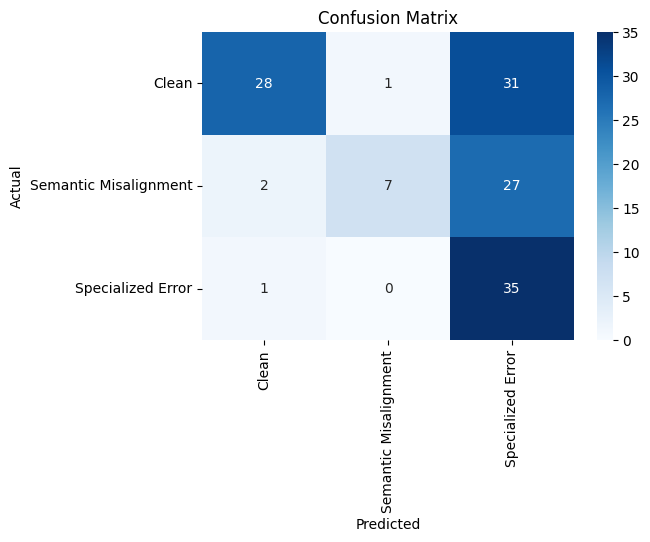

Accuracy: 0.530

Classification Report:
                        precision    recall  f1-score   support

                Clean       0.90      0.47      0.62        60
Semantic Misalignment       0.88      0.19      0.32        36
    Specialized Error       0.38      0.97      0.54        36

             accuracy                           0.53       132
            macro avg       0.72      0.54      0.49       132
         weighted avg       0.75      0.53      0.51       132



In [ ]:
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

y_true = df["Actual_Error"]
y_pred = df["Predicted_Error"]

# 2. Define the order of classes so matrix axes align:
labels = ["Clean", "Semantic Misalignment", "Specialized Error"]

# 3. Compute confusion matrix (raw counts):
cm = confusion_matrix(y_true, y_pred, labels=labels)

# 4. Display it as a heatmap for readability:
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=labels, yticklabels=labels)
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.title("Confusion Matrix")
plt.show()

# 5. Compute overall accuracy:
acc = accuracy_score(y_true, y_pred)
print(f"Accuracy: {acc:.3f}\n")

# 6. Generate detailed per-class metrics:
report = classification_report(y_true, y_pred, labels=labels, zero_division=0)
print("Classification Report:\n", report)

In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score

labels = ["Clean", "Semantic Misalignment", "Specialized Error"]

for label in labels:
    # select only the rows where the actual label is `label`
    mask = df["Actual_Error"] == label

    # compute accuracy on that subset
    acc = accuracy_score(
        df.loc[mask, "Actual_Error"],
        df.loc[mask, "Predicted_Error"]
    )
    print(f"{label:22s} accuracy: {acc:.3f}  (n={mask.sum()})")

Clean                  accuracy: 0.467  (n=60)
Semantic Misalignment  accuracy: 0.194  (n=36)
Specialized Error      accuracy: 0.972  (n=36)
